In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from load_auto import load_auto 
from utils import train_linear_model, plot_cost_history

# Data Ingestion

In [4]:
X_train, y_train = load_auto()

In [5]:
X_train.shape

(392, 7)

In [6]:
y_train.shape

(392, 1)

# Normalize the input variables

In [7]:
X_train_normalized = (X_train - np.mean(X_train)) / np.std(X_train)

# Train two linear models

In [42]:
num_iterations = 10**6
learning_rate = 10**(-1)

# Train on only horsepower (third column)
weight_1, offset_1, history_1 = train_linear_model(X_train_normalized[:, 3].reshape(-1, 1), y_train, num_iterations, learning_rate)
# Train on all parameters except name
weight_2, offset_2, history_2 = train_linear_model(X_train_normalized, y_train, num_iterations, learning_rate)

parameters_1 = np.vstack((offset_1, weight_1))
print(print(f"Coefficients (beta): \n{parameters_1}"))

parameters_2 = np.vstack((offset_2, weight_2))
print(print(f"Coefficients (beta): \n{parameters_2}"))

print(f"Final loss for horsepower: {history_1[-1]}")
print(f"Final loss for all but name: {history_2[-1]}")

Coefficients (beta): 
[[42.52937479]
 [-8.18840662]]
None
Coefficients (beta): 
[[ 208.90211628]
 [-108.28584896]
 [   1.52308185]
 [ -20.11636492]
 [  -6.57681861]
 [ -55.99782867]
 [ 652.71574919]
 [   4.07671588]]
None
Final loss for horsepower: 18.6766165974193
Final loss for all but name: 11.868786013810485


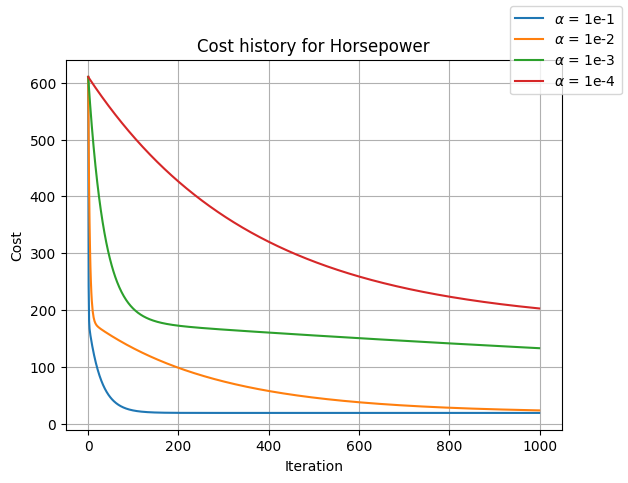

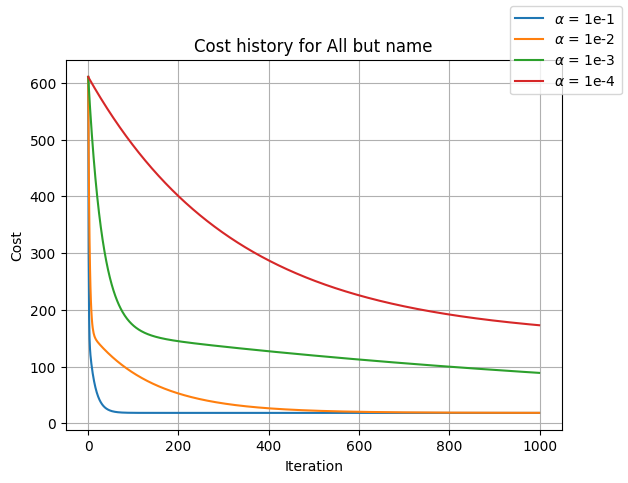

In [45]:
learning_rate_vec = [-1, -2, -3, -4]
training_sets = [X_train_normalized[:, 3].reshape(-1, 1), X_train_normalized]
titles = ["Horsepower", "All but name"]

for X_train, title in zip(training_sets, titles):
    learning_rate_cost = []
    fig, ax = plt.subplots()
    for learning_rate in learning_rate_vec:
        weight, offset, history = train_linear_model(X_train, y_train, 10**3, 10**(learning_rate))
        learning_rate_cost.append(history[-1])
        plot_cost_history(learning_rate, history, ax)
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Cost")
    ax.set_title(f"Cost history for {title}")
    ax.grid()
    fig.legend()

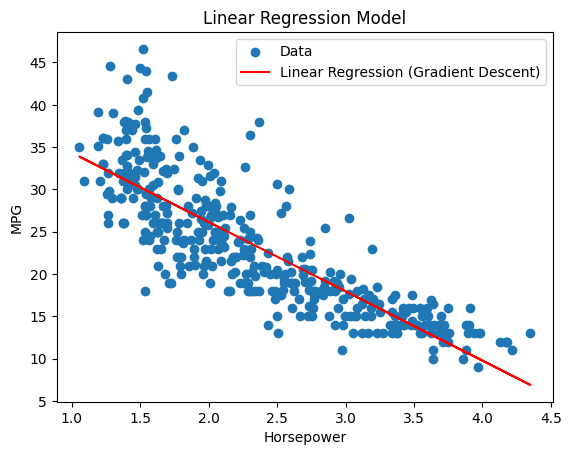

In [44]:
plt.scatter(X_train_normalized[:, 3], y_train, label="Data")
plt.plot(X_train_normalized[:, 3], X_train_normalized[:, 3] * parameters_1[1] + parameters_1[0], color='red', label="Linear Regression (Gradient Descent)")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Linear Regression Model")
plt.legend()
plt.show()
